# App Rating Prediction

### Index
[1. Loading the Dataset.](#1.-Loading-the-Dataset.)

[ 2. Checking for tha Null Values and getting the no of them in each column](#2.-Checking-for-tha-Null-Values-and-getting-the-no-of-them-in-each-column)

[ 3. Dropping the Null values](#3.-Dropping-the-Null-values)

[4. Fixing the variable which are of incorrect type and inconsistant format](#4.-Fixing-the-variable-which-are-of-incorrect-type-and-inconsistant-format)

[5. Univariate Analysis](#5.-Univariate-Analysis)
      
[6. Outlier Treatment](#6.-Outlier-Treatment)

[7. Bivariate Analysis](#7.-Bivariate-Analysis)

[8. Data Preprocessing](#8.-Data-Preprocessing)

[9. Train/Test split to 70-30 Ratio ](#9.-Train/Test-split-to-70-30-Ratio)

[10. Separate the dataframes into X_train, y_train,X_test, and y_test.](#10.-Separate-the-dataframes-into-X_train,-y_train,X_test,-and-y_test.)

[11. Model building](#11.-Model-building)

[12. R squared on Test set](#12.-R-squared-on-Test-set)

In [7]:
import numpy as np
import pandas as pd

# 1. Loading the Dataset. 

In [8]:
df = pd.read_csv('googleplaystore.csv')

In [9]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


# 2. Checking for tha Null Values and getting the no of them in each column

In [10]:
df.isna().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

# 3. Dropping the Null values

In [11]:
# Dropping the Null values and resetting the index
df.dropna(subset = ['Type', 'Content Rating'],axis = 0, inplace= True)
df.reset_index(drop = True, inplace = True)

In [12]:
df['Rating'] = df['Rating'].fillna(df['Rating'].median())

# 4. Fixing the variable which are of incorrect type and inconsistant format

 #### 4.1 converting Mbs to Kbs and converting it to float in 'Size'

In [13]:
def Skb(MegaBytes):
    if (MegaBytes[-1:] == 'M') | (MegaBytes[-1:] == 'm'):
        return float(MegaBytes[:-1])*1000
    elif (MegaBytes[-1:] == 'k') | (MegaBytes[-1:] == 'K'):
        return float(MegaBytes[:-1])*1
    else:
        return np.nan
df['Size'] = df['Size'].apply(Skb)

In [14]:
# converted the data and converted the observations which are of inconsistant format to Null values
# checking for Null values in below cell

In [15]:
df.isna().sum()

App                  0
Category             0
Rating               0
Reviews              0
Size              1694
Installs             0
Type                 0
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64

In [16]:
# we have 1694 Null values in 'Size'.

In [17]:
# size is a Continuous data, so i decided to fill size with mean value of the variable.

In [18]:
df['Size'] = df['Size'].fillna(df['Size'].mean())

#### Dropping the irrelevent cols

In [19]:
# we didnot dropped the Null values in Current version and Android versions,
# in my opinion they are irrelevent cols and hold no significant analytical weightage.
# instead of dropping the Null values we can drop these cols themselves

In [20]:
# dropping the cols with Null values
# resetting the index
df.dropna(axis = 1, inplace = True)
df.reset_index(drop = True, inplace = True)

In [21]:
# checking if there is any Null values
df.isna().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
dtype: int64

we successfully removed Null values and removed unnecessary columns

####  Reviewing the variables

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10839 entries, 0 to 10838
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10839 non-null  object 
 1   Category        10839 non-null  object 
 2   Rating          10839 non-null  float64
 3   Reviews         10839 non-null  object 
 4   Size            10839 non-null  float64
 5   Installs        10839 non-null  object 
 6   Type            10839 non-null  object 
 7   Price           10839 non-null  object 
 8   Content Rating  10839 non-null  object 
 9   Genres          10839 non-null  object 
 10  Last Updated    10839 non-null  object 
dtypes: float64(2), object(9)
memory usage: 931.6+ KB


#### 4.2 converting Reviews to numeric col

In [23]:
df['Reviews'] = df['Reviews'].astype('int64')

#### 4.3 formating the Installs col and converitng it to numerical

In [24]:
df['Installs'].unique() # checking unique values

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+'], dtype=object)

In [25]:
def install(obs):
    if ',' and '+' in obs:
        return int(obs.replace(',', '').strip('+'))
    
df['Installs'] = df['Installs'].apply(install)


successfully removed ',' and  '+' from Installs col

#### 4.4 formating Price column

In [26]:
df['Price'] = [i.strip('$') for i in df['Price']]
df['Price'] = df['Price'].astype('float64')

#### we successfully removed '$' and converted the Price col into numeric

#### 4.5 $ Sanity $  Cheques $ $ $

In [27]:
# 4.5.1 checking the rating are above or below the provided range
print("The ratings less than zero: ",(df['Rating'] < 0).sum())
print("The ratings more than 5: ",(df['Rating'] > 5).sum())

The ratings less than zero:  0
The ratings more than 5:  0


#### There are no records with unusual ratings 

In [28]:
# 4.5.2 checking whether reviews more than Installs
(df['Reviews'] > df['Installs']).sum()

11

#### There are 11 records where reviews are more than installs

In [29]:
# Removing/ dropping the records with reviews more than installs
df =  df[(df['Reviews'] <= df['Installs'])]
df.reset_index(drop = True, inplace = True)

In [30]:
# 4.5.3 checking any free app is priced above 0 
((df['Type'] == 'Free') & df['Price'] > 0).sum()

0

#### There is no such record with Type 'Free' and Priced higher than 0.

# 5. Univariate Analysis

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#### Boxplot for the Price

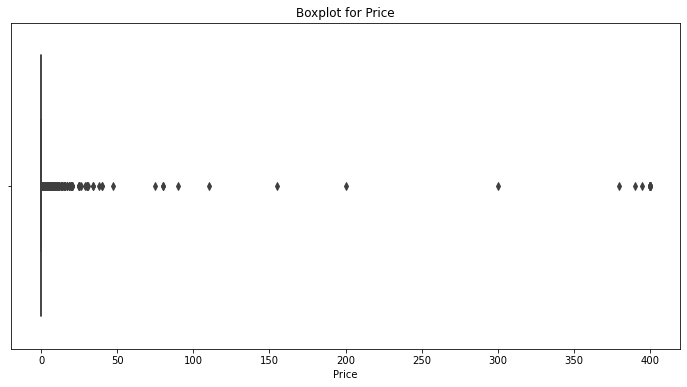

In [32]:
# Direction : Are there any outliers? 
# Think about the price of usual apps on Play Store.       -->(Domain Knowledge)
sns.boxplot(df['Price']).set_title('Boxplot for Price')
plt.gcf().set_size_inches(12, 6)

#### Boxplot for Reviews

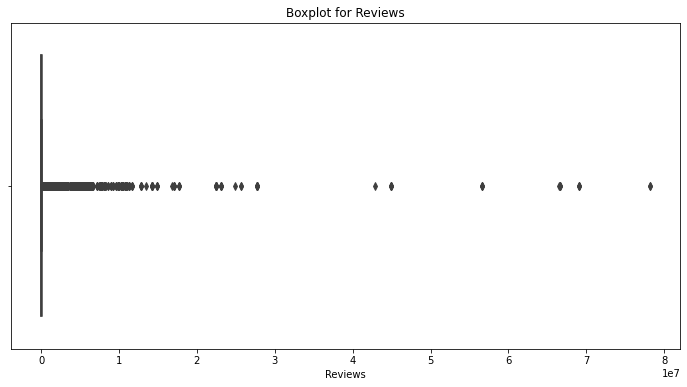

In [33]:
# Direction : Are there any apps with very high number of reviews? 
# Do the values seem right?
#-----------------------------------------------------------------

sns.boxplot(df['Reviews']).set_title('Boxplot for Reviews')
plt.gcf().set_size_inches(12, 6)

#### Histogram for Rating

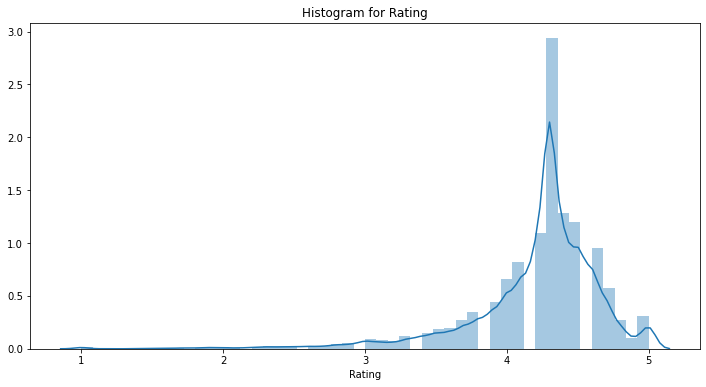

In [34]:
# Direction : How are the ratings distributed? 
# Is it more toward higher ratings?
#-------------------------------------------

sns.distplot(df['Rating']).set_title('Histogram for Rating')
plt.gcf().set_size_inches(12, 6)


#### Histogram for Size

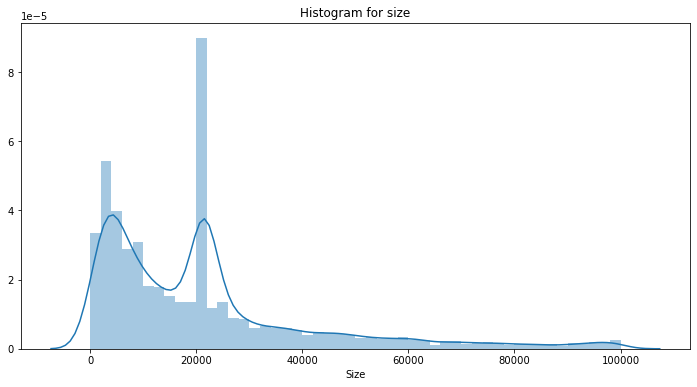

In [35]:
sns.distplot(df['Size']).set_title('Histogram for size')
plt.gcf().set_size_inches(12, 6)

The observations are not normally distributed.

#### final conclusion : From the above plots we can conclude that all the variables have outliers but outliers in "Revies" and "Size" afffecting the dist more significantly

# 6. Outlier Treatment

In [36]:
# 6.1.1 Price: From the box plot, it seems like there are some apps with very high price. 
# A price of $200 for an application on the Play Store is very high and suspicious!
#--------------------------------------------------------------------------------------
# Check out the records with very high price.
# Is 200 indeed a high price?
#---------------------------------------------------------------------------------------

print("No of Apps priced more than 200: ",(df['Price'] > 200).sum())
print("No of Apps priced less than 200: ",(df['Price'] < 200).sum())

No of Apps priced more than 200:  17
No of Apps priced less than 200:  10810


The price of $ 200 is indeed high.

In [37]:
# 6.1.2 # Drop these as most seem to be junk apps

df = df[(df['Price'] <= 0)]
df.reset_index(drop = True, inplace = True)

we successfully removed the apps having price more than $200.

In [38]:
# 6.2 Reviews: Very few apps have very high number of reviews. 

# Direction:
# -----------
# These are all star apps that don’t help with the analysis and, in fact, will skew it. 
# Drop records having more than 2 million reviews.
#----------------------------------------------------

df = df[(df['Reviews'] < 2000000)]

Successfully removed records with more than 2 million reviews.

In [39]:
percentile_list = [10, 25, 50, 70, 90, 95, 99]              # created the list for the percentiles
percentile_value = [np.percentile(df['Installs'],10),
                    np.percentile(df['Installs'],25),
                    np.percentile(df['Installs'],50),
                    np.percentile(df['Installs'],70),
                    np.percentile(df['Installs'],90),
                    np.percentile(df['Installs'],95),
                    np.percentile(df['Installs'],99)
                   ]                                        # created list for the percentile value, so that both
                                                            # lists can be merged to make easy for visualization
    
percentile_list = pd.DataFrame(percentile_list, columns = ['Percentile']) #converting to pandas DF
percentile_value = pd.DataFrame(percentile_value, columns = ['Value'])
percentile_df = pd.concat([percentile_list, percentile_value],axis = 1)   # merge 2 above DFs

In [40]:
percentile_df

,Percentile,Value
0,10,100.0
1,25,5000.0
2,50,100000.0
3,70,1000000.0
4,90,10000000.0
5,95,10000000.0
6,99,100000000.0


In [41]:
df = df[(df['Installs'] <= 10000000) & (df['Installs'] >= 10000)]
df.reset_index(drop = True, inplace = True)

# 7. Bivariate Analysis

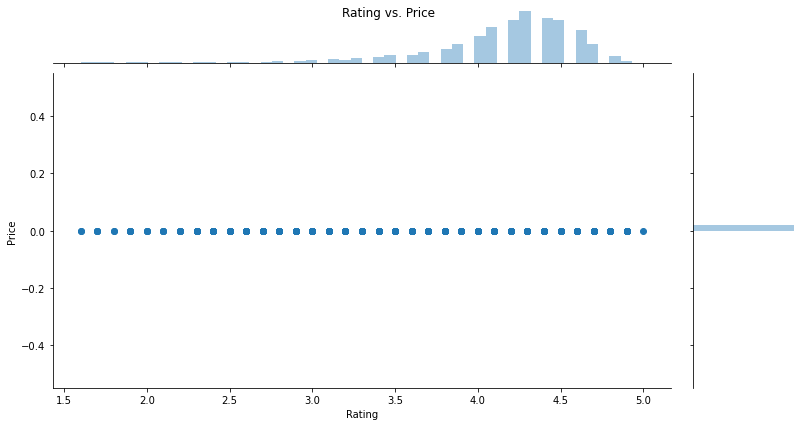

In [42]:
# 7.1 Make scatter plot/joinplot for Rating vs. Price
# What pattern do you observe? Does rating increase with price?
#---------------------------------------------------------------

sns.jointplot(df['Rating'], df['Price']).fig.suptitle('Rating vs. Price')
plt.gcf().set_size_inches(12, 6)

#### No the ratings do not increase with price, they have no linear relations.

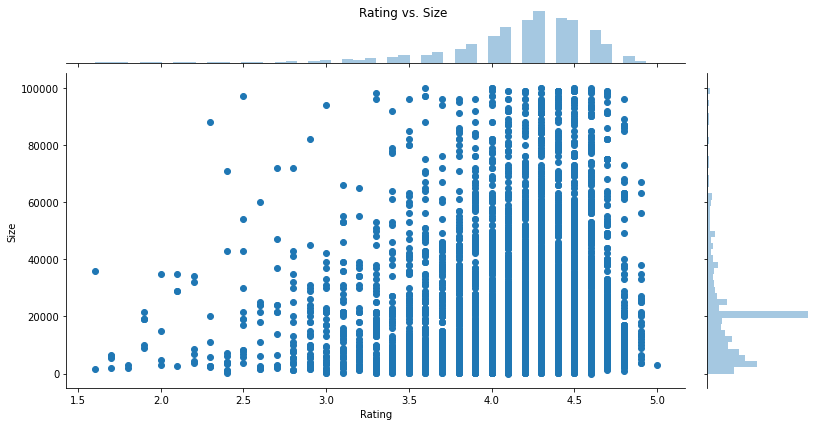

In [43]:
# 7.2 Make scatter plot/joinplot for Rating vs. Size
# Are heavier apps rated better?
#--------------------------------------

sns.jointplot( x = 'Rating', y = 'Size',data = df).fig.suptitle('Rating vs. Size')
plt.gcf().set_size_inches(12, 6)

#### No, heavier apps are not rated better.

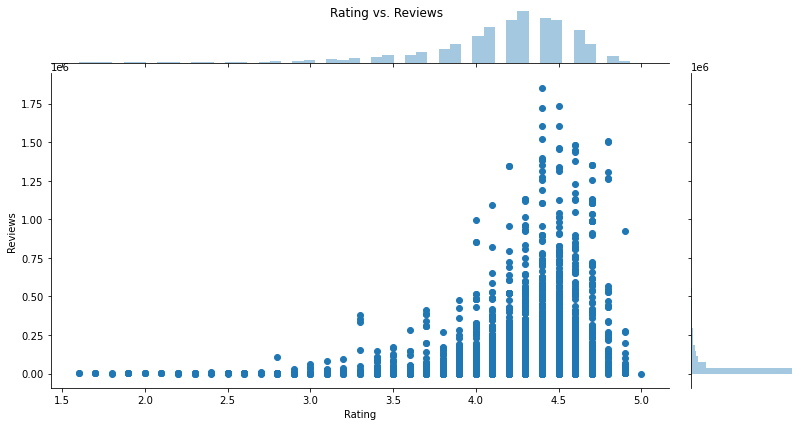

In [44]:
# 7.3 Make scatter plot/joinplot for Rating vs. Reviews
# Does more review mean a better rating always?
#-----------------------------------------------------


sns.jointplot(data = df, x = 'Rating',y = 'Reviews').fig.suptitle('Rating vs. Reviews')
plt.gcf().set_size_inches(12, 6)

#### No, more reviews does not always mean the better ratings.

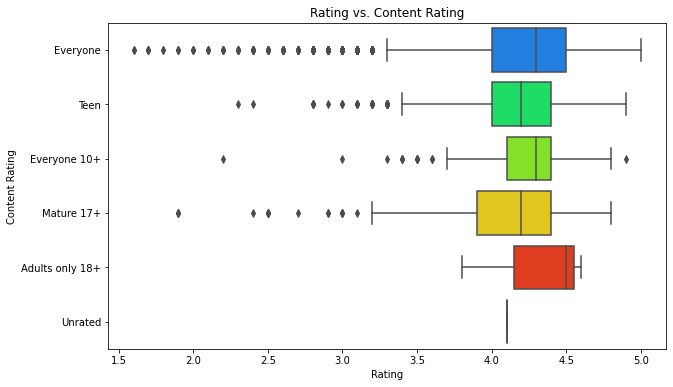

In [45]:
# 7.4 Make boxplot for Rating vs. Content Rating
# Is there any difference in the ratings? Are some types liked better?
#-----------------------------------------------------------------------

sns.boxplot(df['Rating'], 
            df['Content Rating'], 
            palette = 'gist_ncar').set_title('Rating vs. Content Rating')
plt.gcf().set_size_inches(10, 6)

#### yes, there are significant changes in Ratings,
#### 'Everyone', 'Teen' and 'Mature 17+' are rated better than other apps.

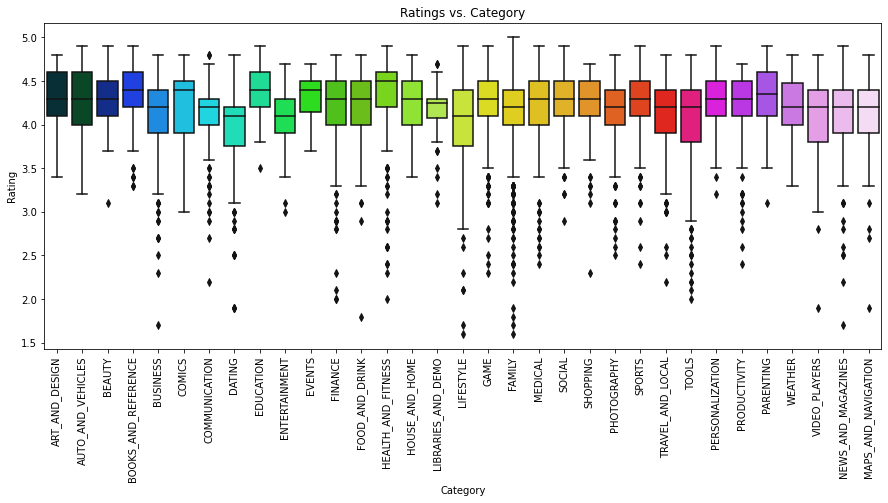

In [46]:
# 7.5 Make boxplot for Ratings vs. Category
# Which genre has the best ratings?
#-----------------------------------------------------

sns.boxplot(x = 'Category',
            y = 'Rating',
            data = df,
            palette = 'gist_ncar').set_title('Ratings vs. Category')

plt.xticks(fontsize=10, rotation = 'vertical')
plt.gcf().set_size_inches(15, 6)

#### 'Art and Design', 'Education', 'Health and Fitness' and 'Parenting has' the highest ratings

# 8. Data Preprocessing

In [47]:
# For the steps below, create a copy of the dataframe to make all the edits. Name it inp1.
# ----------------------------------------------------------------------------------------

inp1 = df.copy() # copied the dataframe.

In [48]:
# 8.1 Reviews and Install have some values that are still relatively very high.
# Before building a linear regression model, you need to reduce the skew. 
# Apply log transformation (np.log1p) to Reviews and Installs.
#------------------------------------------------------------------------------
inp1['log1_reviews'] = np.log1p(inp1['Reviews'])
inp1['log1_installs'] = np.log1p(inp1['Installs'])    #Applying log transformations

##### 8.2 Drop columns App, Last Updated, Current Ver, and Android Ver.These variables are not useful for our task.
##### As $ Current  Ver $ and $ Android Ver $ already removed in earlier steps.
*to see please refer 4.1 
#### or 
#### click here 👇

[Dropping the irrelevent cols](#Dropping-the-irrelevent-cols)       

In [49]:
# Dropping 'App' and 'Last Updated' columns
inp1.drop(['App', 'Last Updated'], axis = 'columns', inplace = True)

In [50]:
# 8.3 Get dummy columns for Category, Genres, and Content Rating.
# This needs to be done as the models do not understand categorical data, and all data should be numeric.
# Dummy encoding is one way to convert character fields to numeric. 
# Name of dataframe should be inp2. 👈 (be aware it should be 'inp2')
#---------------------------------------------------------------------

inp2 = pd.get_dummies(inp1, columns = ['Category', 'Genres', 'Content Rating', 'Type'])

In [51]:
inp2.shape 

(6511, 159)

In [52]:
inp2.drop(['Installs','Reviews'], axis = 1, inplace = True) 
#removed because we made log transformations of both the reviews and installs


# 9. Train/Test split to 70-30 Ratio 

In [59]:
X = inp2.iloc[:,1:]
y = inp2[['Rating']]

# 10. Separate the dataframes into X_train, y_train,X_test, and y_test.

In [60]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X,
                                                 y,
                                                 train_size = 0.7,
                                                 random_state=100)

# 11. Model building

#### 1. Linear regression using linear regression as the technique

In [61]:
from sklearn.linear_model import LinearRegression

apps_lm = LinearRegression()

apps_lm.fit(x_train, y_train)

LinearRegression()

#### 2. R Squared on Train Set

In [62]:
from sklearn.metrics import r2_score

actualLabels = y_train
predLabels = apps_lm.predict(x_train)

r2_train = r2_score(actualLabels,predLabels)
print('R squared of train model is: ',r2_train)

R squared of train model is:  0.21941595187132368


# 12. R squared on Test set

In [63]:
from sklearn.metrics import r2_score

actualLabel = y_test
predLabel = apps_lm.predict(x_test)

r2_test = r2_score(actualLabel,predLabel)
print('R squared of test model is: ',r2_test)

R squared of test model is:  0.17169005315079056


![The End](https://drive.google.com/uc?export=view&id=1bjUl97fMuwiJxamBtdiQxxZPIwBplV8F)

[to go to top](#App-Rating-Prediction)